# The Titanic challenge 

This challenge is to predict the survival or the death of a given passenger based on a set of variables that describes them.

I use 3 different forms of supervised machine learning, decision tree, random forest and svm to train my mdoel and then choose the best model based on accuracy score. 



I have played around with the data and achieved an of : submission scored 0.79425


# 1. Introduction

import data and dependencies 

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [73]:
%pylab inline
%matplotlib inline

train = pd.read_csv("../Titanic/train.csv")
test = pd.read_csv("../Titanic/test.csv")
train_test_data = [train,test]


Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**1.1 Overview of the data 

In [74]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [75]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
train.isnull().sum()
test.isnull().sum()
#In both dataset,Age and cabin values are missing

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 2. Exploratory data analysis (EDA)
Learn about the data, look for obvious relationships wrt survival 

I first hypothesis that sex and class will have a major influence on survival (recall the movie 'woman and children first )

In [78]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts(normalize = True)
    dead = train[train['Survived']==0][feature].value_counts(normalize = True)
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar',stacked = True,figsize =(10,5))

# Sex and survival

Text(0.5,1,'Sex survival')

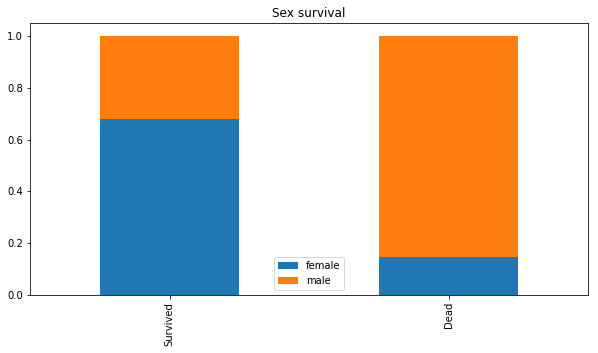

In [79]:
bar_chart('Sex')
plt.title("Sex survival")
#females had a higher chance of surviving 

# Pclass and survival
pclass can be seen as proxy for socio-economic status (SES):
1st = Upper
2nd = Middle
3rd = Lower


Text(0.5,1,'Ticket class survival')

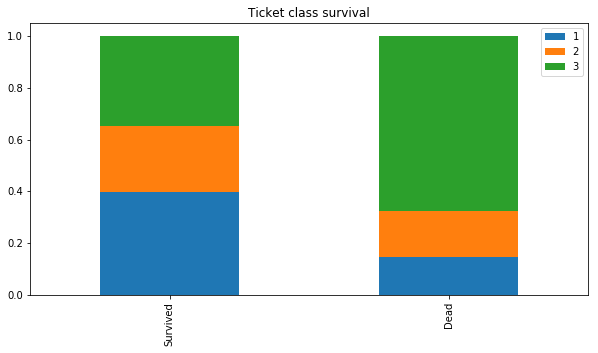

In [80]:
bar_chart('Pclass')
plt.title("Ticket class survival")
# those with a 3rd class ticket have a lower survival chance 

# Pclass, Sex and survival
lets visualise survival based on both Pclass and sex 


In [81]:
def bar_chart1(gender):
    rich = train.Survived[(train.Sex == gender)&(train.Pclass ==1)].value_counts(normalize = True)  
    poor = train.Survived[(train.Sex == gender)&(train.Pclass ==3)].value_counts(normalize = True)  
    df = pd.DataFrame([rich,poor])
    df.index = ['rich','poor']
    df.plot(kind = 'bar',stacked = True,figsize =(10,5))
    plt.legend(("survived","died"))
    plt.title( gender+ " survival and class")

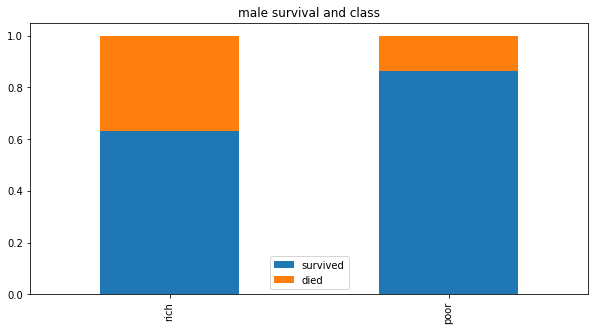

In [82]:
bar_chart1("male")

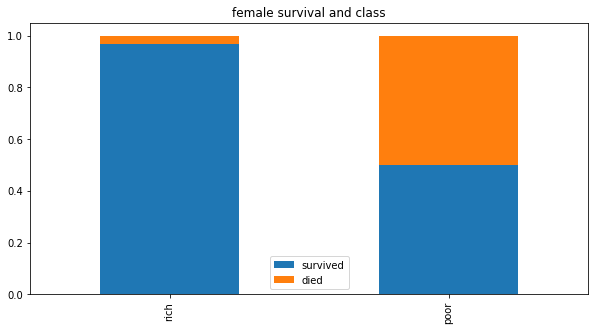

In [83]:
bar_chart1("female")


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Class, Sex and Survival')

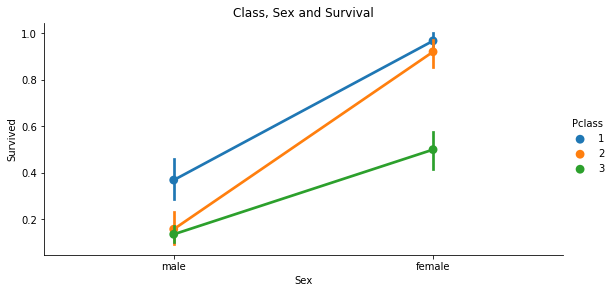

In [84]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)
plt.title("Class, Sex and Survival")


Inline with my hypothesis there seem to exist a relationship between sex, ticket class amd survival. Females have a higher survival rate and this increases with class (note 100% surivival rate of females of first class). Men of lower ticket class (3rd class) are have little survival rate

# 3. First model
*************
It is always good to have a look at the data first, and get generalized prediction to set a benchmarked model (at least one prediction), before fine tuning the model (adding features/engineer feature) so thar we can see how our effort can translates to better results

************

In [85]:
#First hypothesis, if you are a female you survive, else you die
train["Hyp"] = 0 
train.loc[train.Sex == "female","Hyp"]= 1
train["Result"] =0
train.loc[train.Survived == train["Hyp"], "Result"]= 1
print (train["Result"].value_counts(normalize = True))

1    0.786756
0    0.213244
Name: Result, dtype: float64


Even such arbitrary algorithum on sex returns an 78% accuracy rate. Thus always check the data for baseline model. 

In [86]:
train = train.drop('Hyp', axis=1)
train = train.drop('Result', axis=1)


*********
# MAYBE ADDD ANOTHER MODEL
**********

# 4.Feature engineering
<li> Data mapping - Turing groups of categorical variables into numerical numbers for ML </li>
<li>Data Binning - converting categorial variable to numerical</li>


In [87]:
train.head()
train_test_data = [train,test]


In [88]:
#Sex mapping 
sex_mapping= {"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset["Sex"].map(sex_mapping)


#Tittle mapping & extracting
title map;
Mr: 0
Miss: 1
Mrs: 2
Rare: 3
Children: 4   

In [89]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.',expand = False)



In [90]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Lady          1
Don           1
Countess      1
Mme           1
Ms            1
Capt          1
Sir           1
Name: Title, dtype: int64

In [91]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

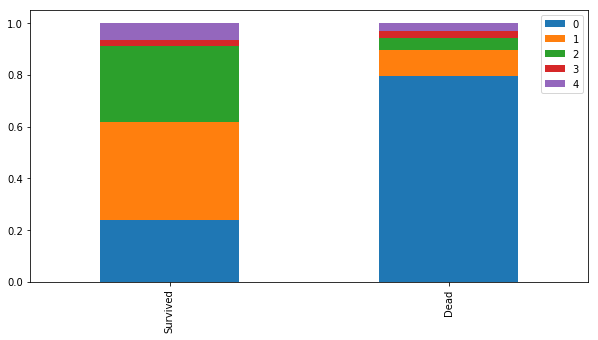

In [92]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":4,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":1,"Countess":3,"Ms":3,"Lady":2,"Jonkheer":3,"Don":3,"Dona":3,"Mme":2,"Capt":3,"Sir":0}
for dataset in train_test_data:
    dataset['Title']= dataset['Title'].map(title_mapping)
   
bar_chart('Title')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


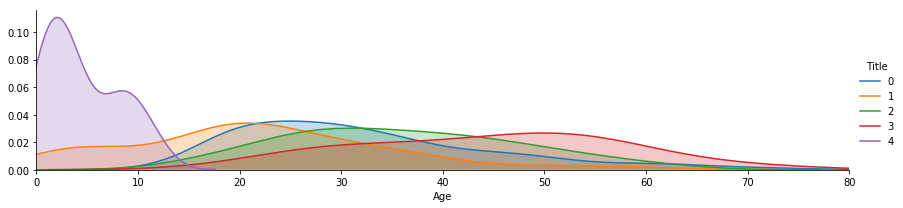

In [93]:
facet = sns.FacetGrid(train, hue = "Title", aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True )
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show( )

#age distribution based on title.

# Missing data 

Strategies
- Drop observations with missing data
- Set NaN values to 0 for continuous / for categorical make missing category
- Use some average value
- Use machine learning algorithm to predict missing data


In [94]:
#Filling in missing age using medium age based on title 
train["Age"].fillna(train.groupby("Title")["Age"].transform("mean"),inplace = True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("mean"),inplace = True)



In [95]:
train["Age"].describe()

count    891.000000
mean      29.764202
std       13.280334
min        0.420000
25%       21.804054
50%       30.000000
75%       35.900000
max       80.000000
Name: Age, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


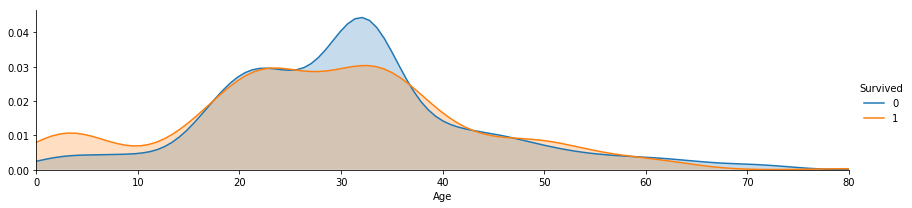

Ellipsis

In [96]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True )
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show( )

#for a more closer look setting the xlimits
#plt.xlim(0,20)
#plt.xlim(20,30)
#plt.xlim(30,40)
...
#plt.xlim(60)

It seem as if children has a higher survival rate and those in their mid-age are more likely to die  

# 
Data  binnings allows for clear relationships to been seen with categorial variables; 



In [97]:
#Age
"""
vector map:
    child = 0
    teen = 1
    adult = 2
    middle-age = 3 
    senior =4 
"""


'\nvector map:\n    child = 0\n    teen = 1\n    adult = 2\n    middle-age = 3 \n    senior =4 \n'

In [98]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset.loc[dataset ['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset ['Age'] > 16) & (dataset['Age'] <=23), 'Age'] = 1, 
    dataset.loc[(dataset ['Age'] > 23) & (dataset['Age'] <=45), 'Age'] = 2, 
    dataset.loc[(dataset ['Age'] > 45) & (dataset['Age'] <=65), 'Age'] = 3, 
    dataset.loc[(dataset ['Age'] >65), 'Age'] = 4



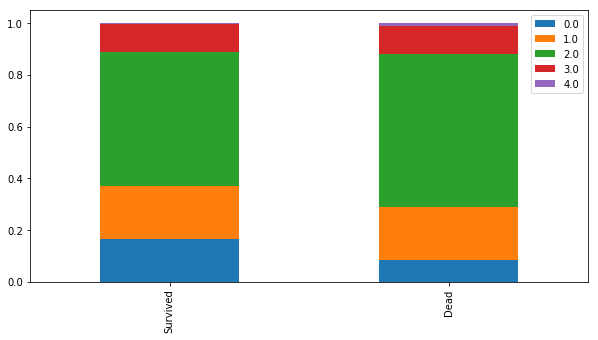

In [99]:
bar_chart('Age')


In [100]:
#Cabin
train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
D                  3
C22 C26            3
F33                3
E101               3
F2                 3
F4                 2
E8                 2
B20                2
C124               2
D35                2
B35                2
B18                2
E33                2
F G73              2
C65                2
E25                2
B5                 2
D26                2
E24                2
D36                2
E121               2
B49                2
B22                2
C78                2
B57 B59 B63 B66    2
C68                2
C126               2
                  ..
C103               1
E58                1
B71                1
E68                1
D15                1
C101               1
D10 D12            1
C128               1
B73                1
B30                1
A6                 1
A32                1
D6                 1
F E69              1
T                  1
B42                1
F38          

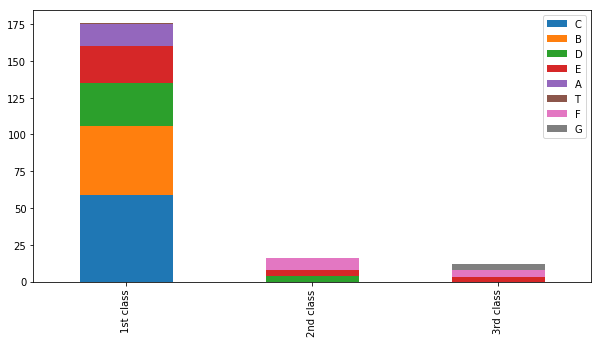

In [101]:
#Cabin extract first letter of the ticket
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

Pclass1 = train[train['Pclass'] ==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] ==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] ==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind = 'bar', stacked =True, figsize = (10,5))

In [102]:
##Cabin mapping, keeping in range of Pclass
cabin_mapping = {"A":0,"B":0.4,"C":0.8, "D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [103]:
#fill missing Cabin with median of each pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace=True)


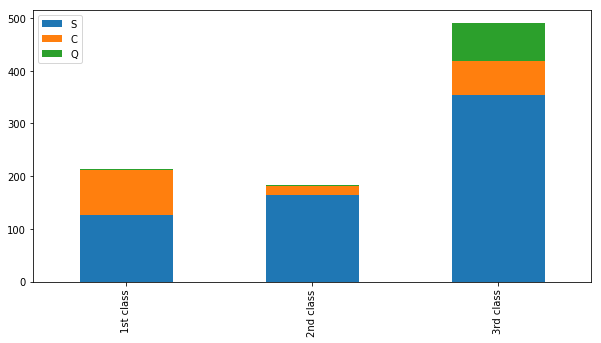

In [104]:
#Embarked
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [105]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [106]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [107]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,2.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,0.8,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,2.0,0,0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,2.0,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,1.6,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,2.0,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,2.0,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,1.8,1,2


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


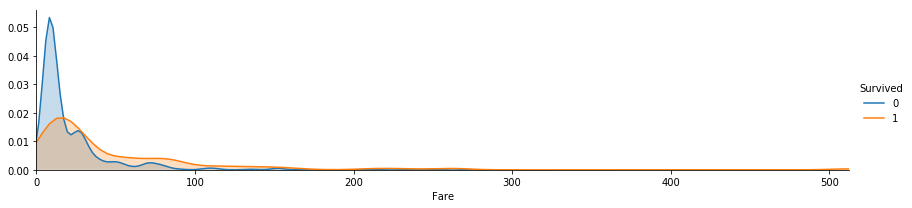

In [108]:

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

In [109]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0


In [111]:
##Delete unnecessary feature from dataset 
feature_drop = ['Ticket','SibSp','Parch','Name']
train = train.drop(['PassengerId'],axis =1)
train = train.drop(feature_drop, axis =1)

In [112]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [113]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title
0,3,0,1.0,0.0,2.0,0,0
1,1,1,2.0,2.0,0.8,1,2
2,3,1,2.0,0.0,2.0,0,1
3,1,1,2.0,2.0,0.8,0,2
4,3,0,2.0,0.0,2.0,0,0


########################################Data modeling###############################


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import numpy as np

In [115]:
#Cross Validation (K-fold)
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits =10, shuffle =True,random_state = 0)

## Decision Tree

In [116]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.80898876 0.82022472 0.83146067 0.83146067 0.84269663
 0.83146067 0.82022472 0.75280899 0.84269663]


In [117]:
round(np.mean(score)*100, 2)


81.82

# Random Forest

In [118]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv  = k_fold,n_jobs =1, scoring = scoring)
print(score)

[0.78888889 0.79775281 0.78651685 0.82022472 0.87640449 0.79775281
 0.78651685 0.82022472 0.74157303 0.86516854]


In [119]:
round(np.mean(score)*100,2)

80.81

# SVM

In [120]:
from sklearn.svm import SVC
scoring = 'accuracy'
score = cross_val_score(SVC(), train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.83333333 0.79775281 0.84269663 0.80898876 0.85393258 0.83146067
 0.83146067 0.80898876 0.79775281 0.82022472]


In [121]:
round(np.mean(score)*100,2)

82.27

since support vector machine learning gives the best results, i use this model for my final result. 

## Testing

In [122]:
#feature drop for test dataset 
feature_drop = ['Ticket','SibSp','Parch','Name']
test = test.drop(feature_drop, axis =1)

In [123]:
test.info()
#test set ready to be use 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
dtypes: float64(3), int64(5)
memory usage: 26.2 KB


In [124]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [125]:

results = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

results.to_csv('result.csv', index=False)

In [126]:
result = pd.read_csv('result.csv')


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
